In [163]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster

In [164]:
df = pd.read_csv('averge_groupby.csv', index_col = 0)

In [165]:
df.head()

,business_id,categories,stars,review_count,is_open,Median,Pop,checkins
0,0,0,0.0,0.0,0.0,50819.956081,8973.613012,0.000000
1,--7zmmkVg-IMGaXbuVd0SQ,Food;Breweries,4.0,47.0,1.0,85719.500300,27695.000000,3.400000
2,--8LPVSo5i0Oo61X01sV9A,Orthopedists;Weight Loss Centers;Sports Medici...,4.5,3.0,1.0,80070.303600,50014.000000,1.000000
3,--9QQLMTbFzLJ_oT-ON3Xw,Hair Salons;Beauty & Spas,3.5,11.0,1.0,53997.277500,44813.000000,1.178571
4,--9e1ONYQuAa-CB_Rrw7Tw,Cajun/Creole;Steakhouses;Restaurants,4.0,1451.0,1.0,37456.017000,9490.000000,18.608696


In [166]:
df = df[['review_count','checkins']]
df.head()

,review_count,checkins
0,0.0,0.000000
1,47.0,3.400000
2,3.0,1.000000
3,11.0,1.178571
4,1451.0,18.608696


In [167]:
# plt.scatter(df.review_count, df.checkins, edgecolor = 'red')
# plt.show()

In [168]:
df_cluster = np.array(df) 

In [169]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [170]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

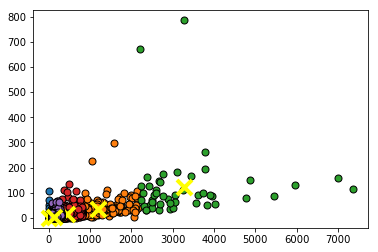

In [174]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = df_cluster[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7, markeredgecolor='black')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx', markeredgecolor='yellow')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()